# 複数候補を一度に探索する

1回の探索ステップで、2つ以上の候補を一度に評価する場合のチュートリアルです。

## 探索候補データの準備

In [1]:
import physbo

import os
import urllib
import ssl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ssl._create_default_https_context = ssl._create_unverified_context

def download():
    if not os.path.exists('data/s5-210.csv'):

        if not os.path.exists('data'):
            os.mkdir('data')
            
        print('Downloading...')
        response = urllib2.urlopen("http://www.tsudalab.org/files/s5-210.csv")
        with open('data/s5-210.csv', 'wb') as out_file:
            out_file.write(response.read())
        response.close()
        print('Done')
        
def load_data():
    download()
    A =  np.asarray(np.loadtxt('data/s5-210.csv',skiprows=1, usecols=(3,4,5,6), delimiter=',') )
    X = A[:,0:3]
    t  = -A[:,3]
    return X, t

X, t = load_data()
X = physbo.misc.centering(X)

## simulator の定義

後述の `num_search_each_probe` を2以上にした場合、action には action ID の array が入力されます。  
各 action ID に対応した評価値のリストを返すように定義してください。

基本チュートリアルと simulator の定義は同じですが、
t は numpy.array であり、action に array が入力されると `self.t[action]` も array になる点に留意してください。

In [2]:
class simulator:
    def __init__( self ):
        _, self.t = load_data()
    
    def __call__( self, action ):
        return self.t[action]

simulator の実行例

In [3]:
sim = simulator()
sim([1,12,123])

array([-1.01487066, -1.22884748, -1.05572838])

## 最適化の実行

In [4]:
# policy のセット 
policy = physbo.search.discrete.policy(test_X=X)

# シード値のセット 
policy.set_seed( 0 )

`num_search_each_probe` によって、各探索ステップにおいて評価する候補数を指定することができます。

下記の実行例だと、ランダムサーチにより 2 ×10 = 20回、ベイズ最適化により 8 ×10 = 80回 simulator を評価することになります。 

**引数**  

- `max_num_probes`: 探索ステップ数  
- `num_search_each_probe`: 各探索ステップにおいて評価する候補数

In [5]:
res = policy.random_search(max_num_probes=2, num_search_each_probe=10, simulator=simulator())

res = policy.bayes_search(max_num_probes=8, num_search_each_probe=10, simulator=simulator(), score='EI', 
                                                  interval=2, num_rand_basis=0)

0001-th multiple probe search (random) 

current best f(x) = -0.980054 (best action = 4547) 
list of simulation results
f(x)=-1.070602 (action = 15673)
f(x)=-1.009056 (action = 9559)
f(x)=-1.195844 (action = 16927)
f(x)=-0.980054 (action = 4547)
f(x)=-0.992820 (action = 2553)
f(x)=-1.146676 (action = 13144)
f(x)=-1.006255 (action = 10827)
f(x)=-0.999862 (action = 1995)
f(x)=-1.055445 (action = 10763)
f(x)=-1.100970 (action = 16450)


0002-th multiple probe search (random) 

current best f(x) = -0.980054 (best action = 4547) 
list of simulation results
f(x)=-1.208666 (action = 13085)
f(x)=-1.069404 (action = 15133)
f(x)=-1.031642 (action = 1706)
f(x)=-1.016702 (action = 2464)
f(x)=-1.172569 (action = 17812)
f(x)=-1.082219 (action = 16533)
f(x)=-1.025272 (action = 1336)
f(x)=-1.031761 (action = 10076)
f(x)=-0.984972 (action = 8876)
f(x)=-1.107730 (action = 15577)


Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood

## 結果の確認

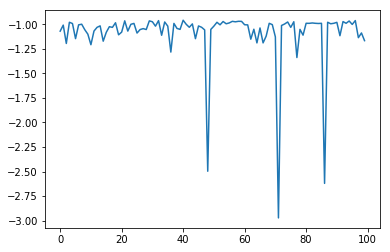

In [6]:
plt.plot(res.fx[0:res.total_num_search])

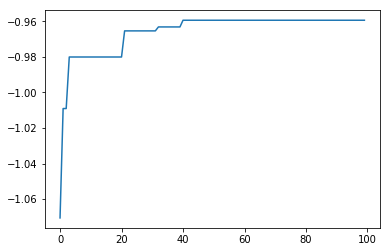

In [7]:
best_fx, best_action = res.export_all_sequence_best_fx()
plt.plot(best_fx)

`res.export_sequence_best_fx()` により、各ステップまでに得られたベスト値とその action の履歴 を得られます。  

`res.export_all_sequence_best_fx()` との違いは、simulator の評価毎ではなく、探索ステップ毎の情報だという点です。  
(今回の場合は合計ステップ数は 10, 評価数は 100 です）

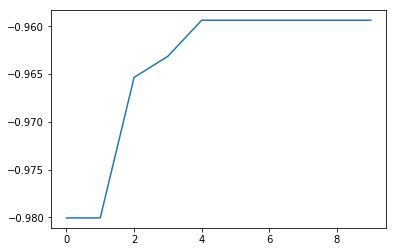

In [8]:
best_fx, best_action = res.export_sequence_best_fx()
plt.plot(best_fx)